<a href="https://colab.research.google.com/gist/venkateshtantravahi/1dfd1a40b14a76130f633e1434058be8/rain-in-australia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Dataset

<img style="align:center" src="https://storage.googleapis.com/kaggle-datasets-images/6012/1733506/0a5af086168a9b87a38b29bac75aa8ce/dataset-cover.jpg?t=2020-12-11-10-57-11">

## Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

## Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [2]:
!pip install kaggle

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/kaggle'

In [5]:
! kaggle datasets download -d jsphyg/weather-dataset-rattle-package

  0% 0.00/3.83M [00:00<?, ?B/s]
100% 3.83M/3.83M [00:00<00:00, 196MB/s]


In [6]:
!unzip weather-dataset-rattle-package.zip

Archive:  weather-dataset-rattle-package.zip
  inflating: weatherAUS.csv          


# Necessary Imports

In [2]:
import pandas as pd
import plotly.express as ex
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [3]:
weather_data = pd.read_csv('weatherAUS.csv')
weather_data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [26]:
print(weather_data.columns)
print(weather_data.shape)

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')
(145460, 23)


In [27]:
# check column types to make sure every feature has been properly read
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [28]:
weather_data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

# Missing Values

In [48]:
missing_percentage = weather_data.isna().mean() * 100
print(missing_percentage)

Date              0.000000
Location          0.000000
MinTemp           0.072751
MaxTemp           0.036375
Rainfall          0.000000
Evaporation      40.940102
Sunshine         45.770754
WindGustDir       0.000000
WindGustSpeed     0.000000
WindDir9am        0.000000
WindDir3pm        0.000000
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.818042
Humidity3pm       1.230297
Pressure9am       7.372080
Pressure3pm       7.330854
Cloud9am         37.372888
Cloud3pm         38.988764
Temp9am           0.277261
Temp3pm           0.642632
RainToday         0.000000
RainTomorrow      0.000000
dtype: float64


In [31]:
# Categorical columns that have missing values
weather_data_cat = weather_data.select_dtypes(include = ['object'])

(weather_data_cat.isna().sum().sort_values(ascending = False)) / len(weather_data)

WindDir9am      0.072639
WindGustDir     0.070989
WindDir3pm      0.029066
RainTomorrow    0.022460
RainToday       0.022419
Date            0.000000
Location        0.000000
dtype: float64

In [32]:
# Drop the rows with the missing values
for column_name in weather_data_cat.columns:
    weather_data.dropna(subset=[column_name], inplace=True)
    weather_data_cat.dropna(subset=[column_name], inplace=True)

# Check the shape after dropping rows with missing values
weather_data.shape

(123710, 23)

# Numerical Data Analysis

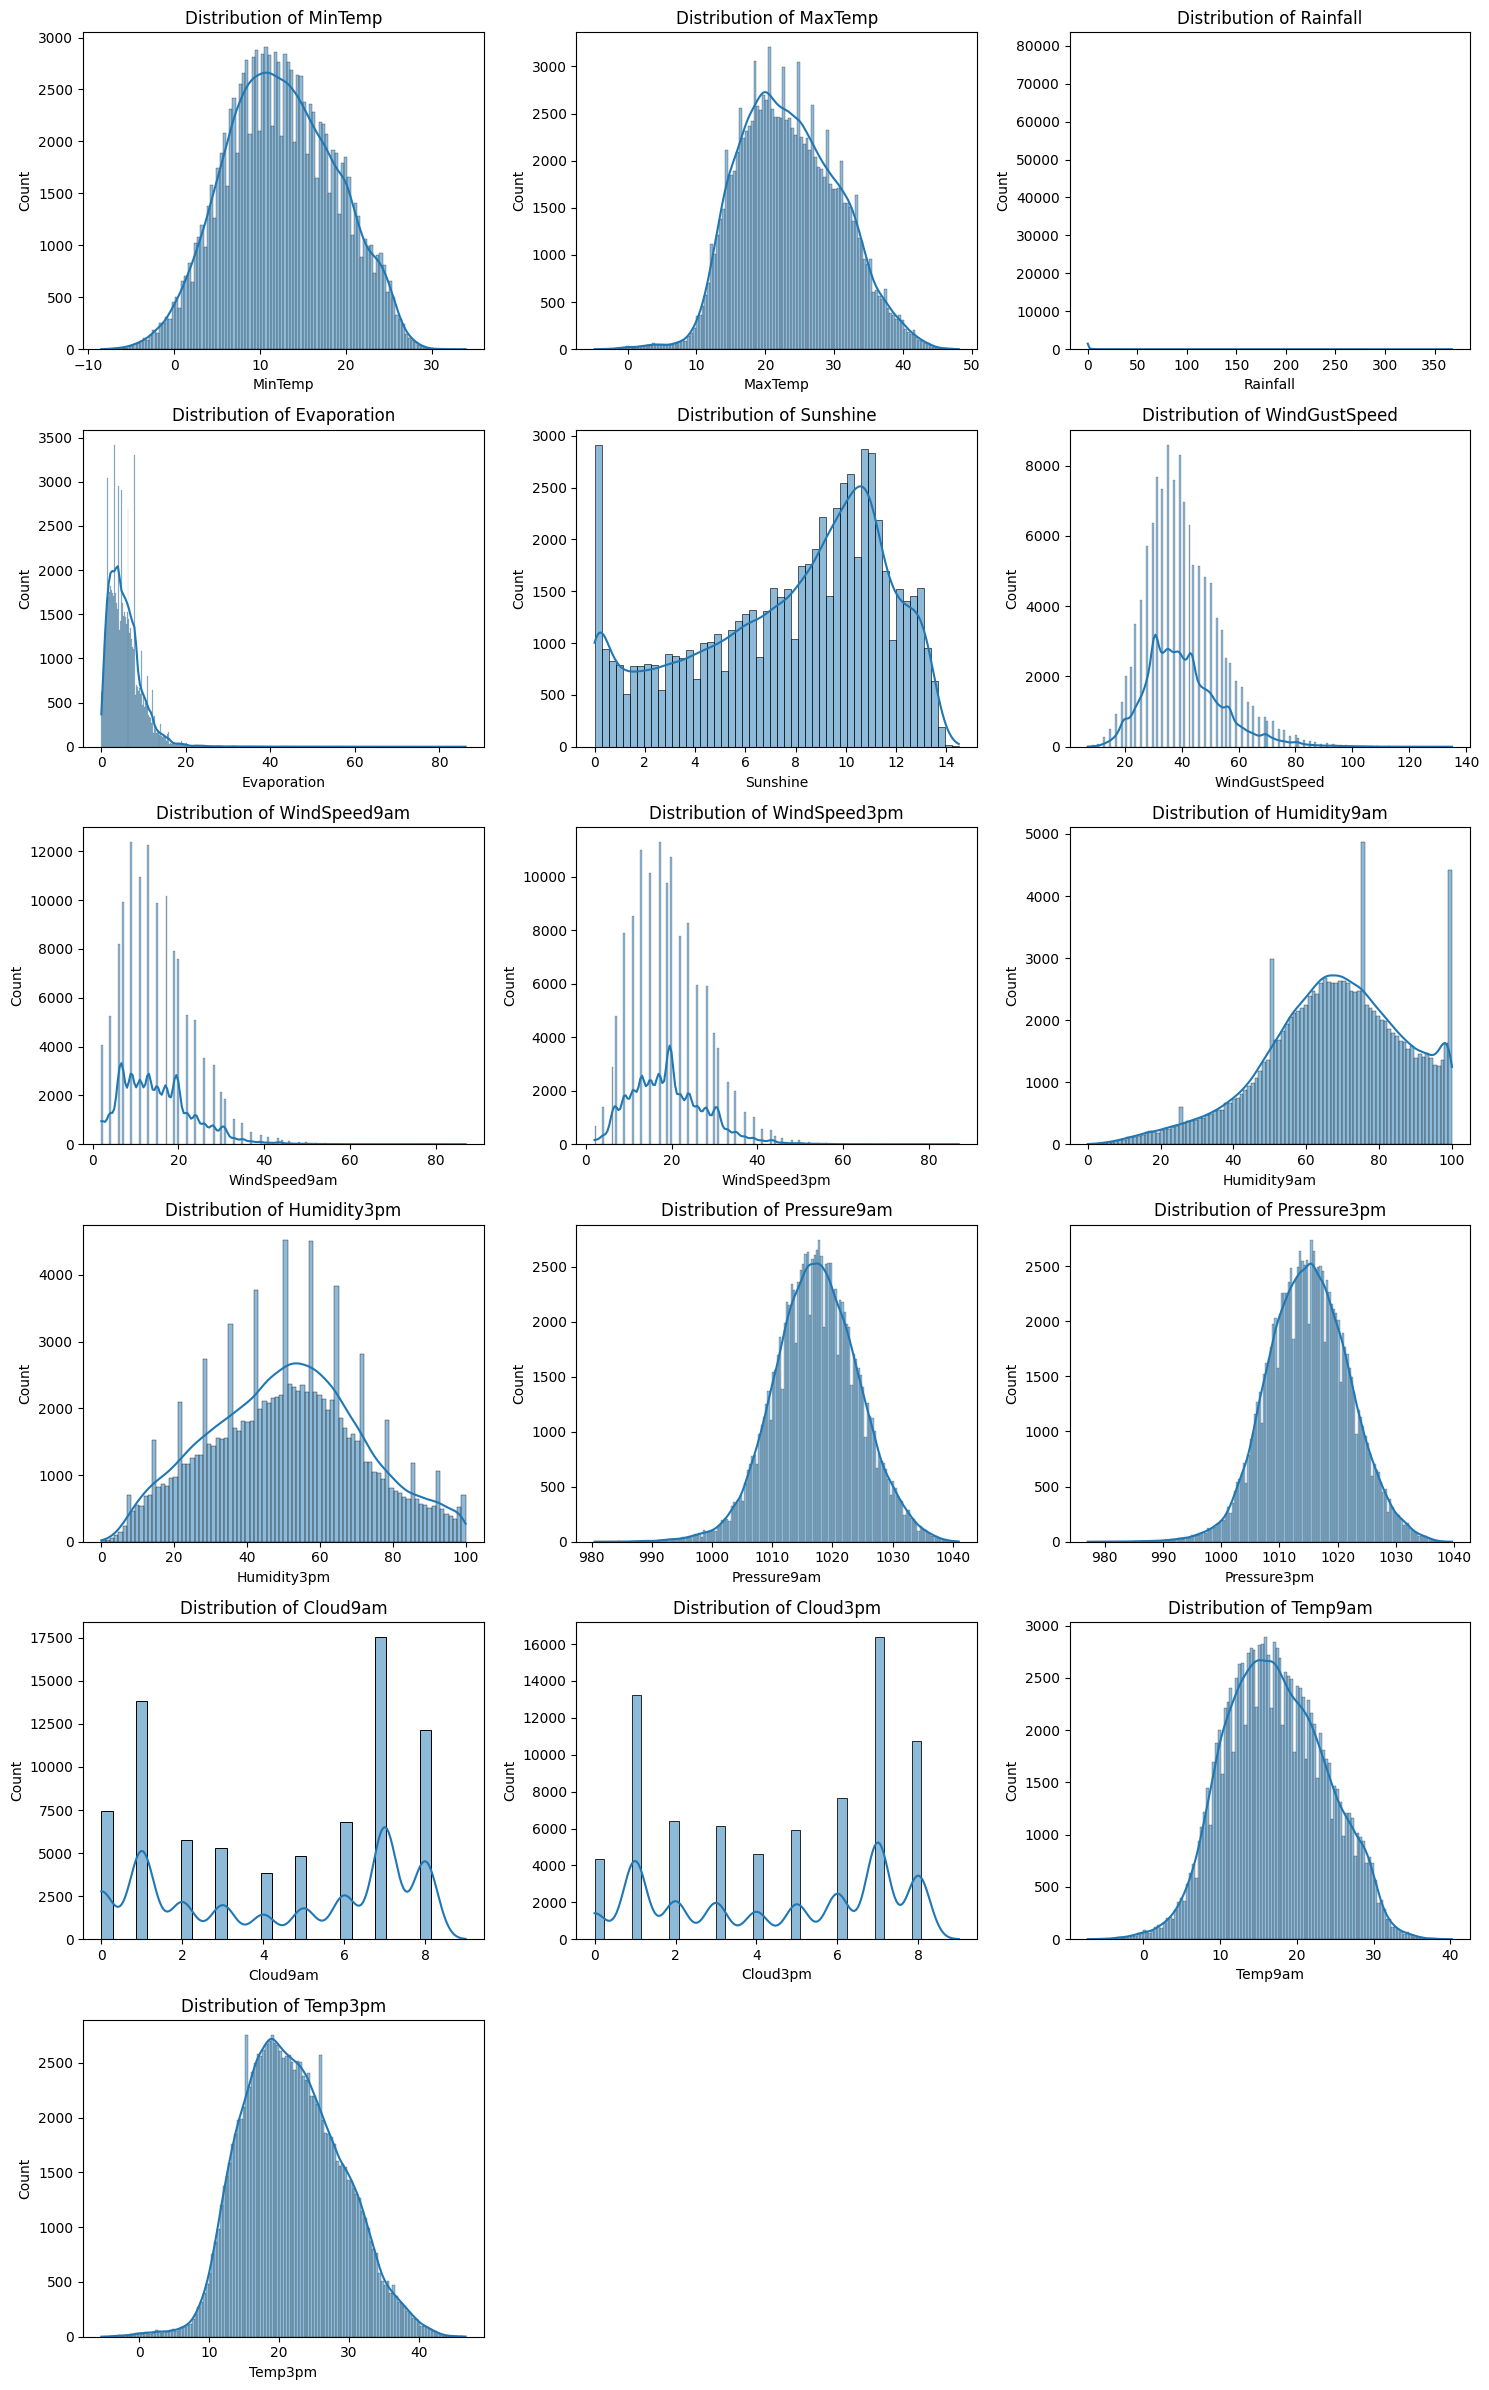

In [35]:
numerical_cols = weather_data.select_dtypes(include=['float64', 'int64'])

# Determine the grid size
n_cols = 3  # Number of columns in the grid
n_rows = (len(numerical_cols.columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create a figure and a grid of subplots
plt.figure(figsize=(15, 4 * n_rows))
for i, col in enumerate(numerical_cols.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(numerical_cols[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode the target column
le = LabelEncoder()
weather_data['RainTomorrow'] = le.fit_transform(weather_data['RainTomorrow'])

# Check the encoded column
print(weather_data['RainTomorrow'].head())

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64


In [37]:
weather_data.RainTomorrow.value_counts()

0    96318
1    27392
Name: RainTomorrow, dtype: int64

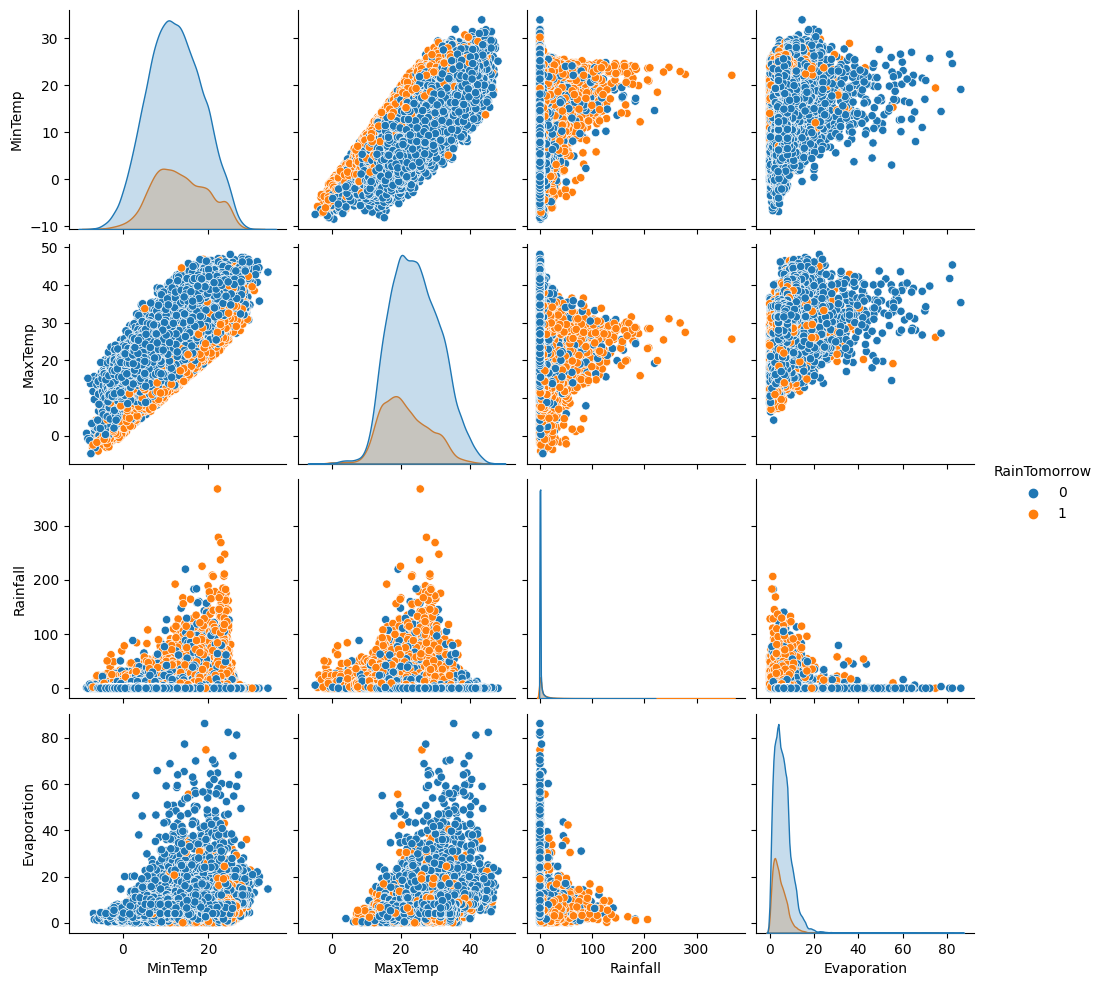

In [38]:
# Select a few numerical columns for pair plot
selected_columns = numerical_cols.columns[:4].tolist()  # Select the first 4 columns for simplicity
selected_columns.append('RainTomorrow')

# Create pair plot
sns.pairplot(weather_data[selected_columns], hue='RainTomorrow')
plt.show()


# Categorical Data Analysis

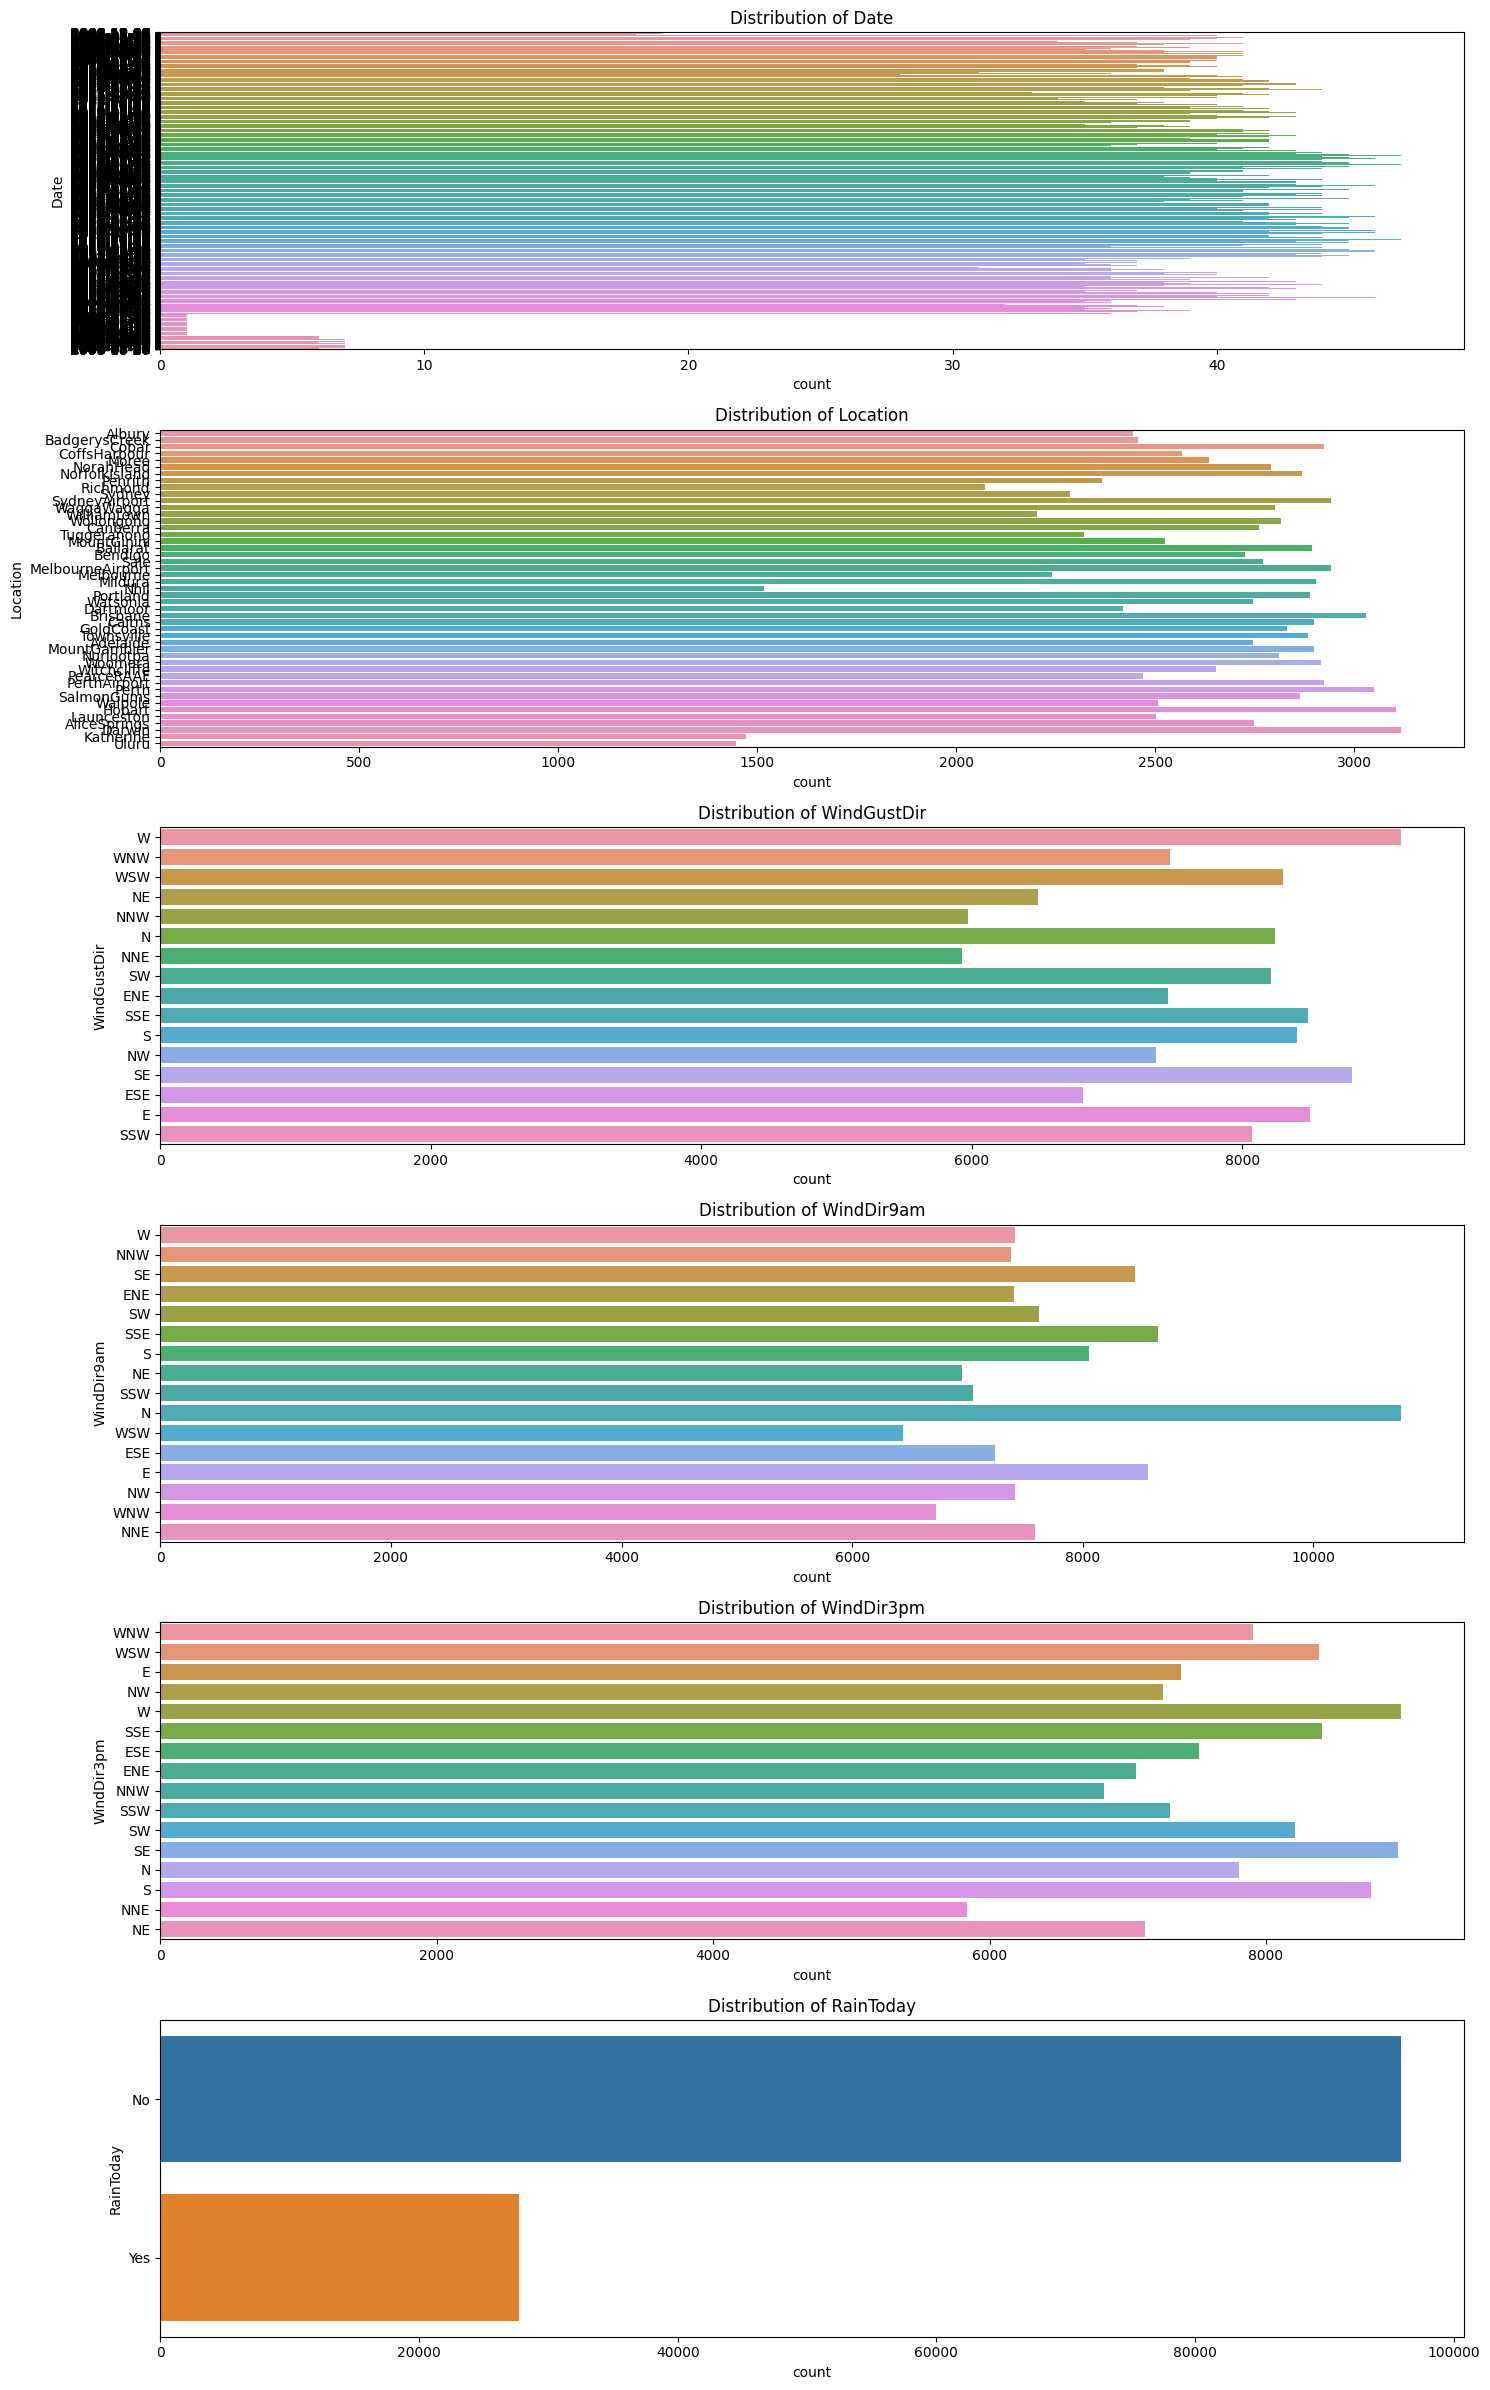

In [39]:
# Select categorical columns
categorical_cols = weather_data.select_dtypes(include=['object'])

# Plot distribution of each categorical feature
plt.figure(figsize=(15, len(categorical_cols.columns) * 4))
for i, col in enumerate(categorical_cols.columns):
    plt.subplot(len(categorical_cols.columns), 1, i + 1)
    sns.countplot(y=categorical_cols[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

In [40]:
# Create a copy of the DataFrame for encoding
encoded_data = weather_data.copy()

# Encode each categorical column
for col in categorical_cols.columns:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])

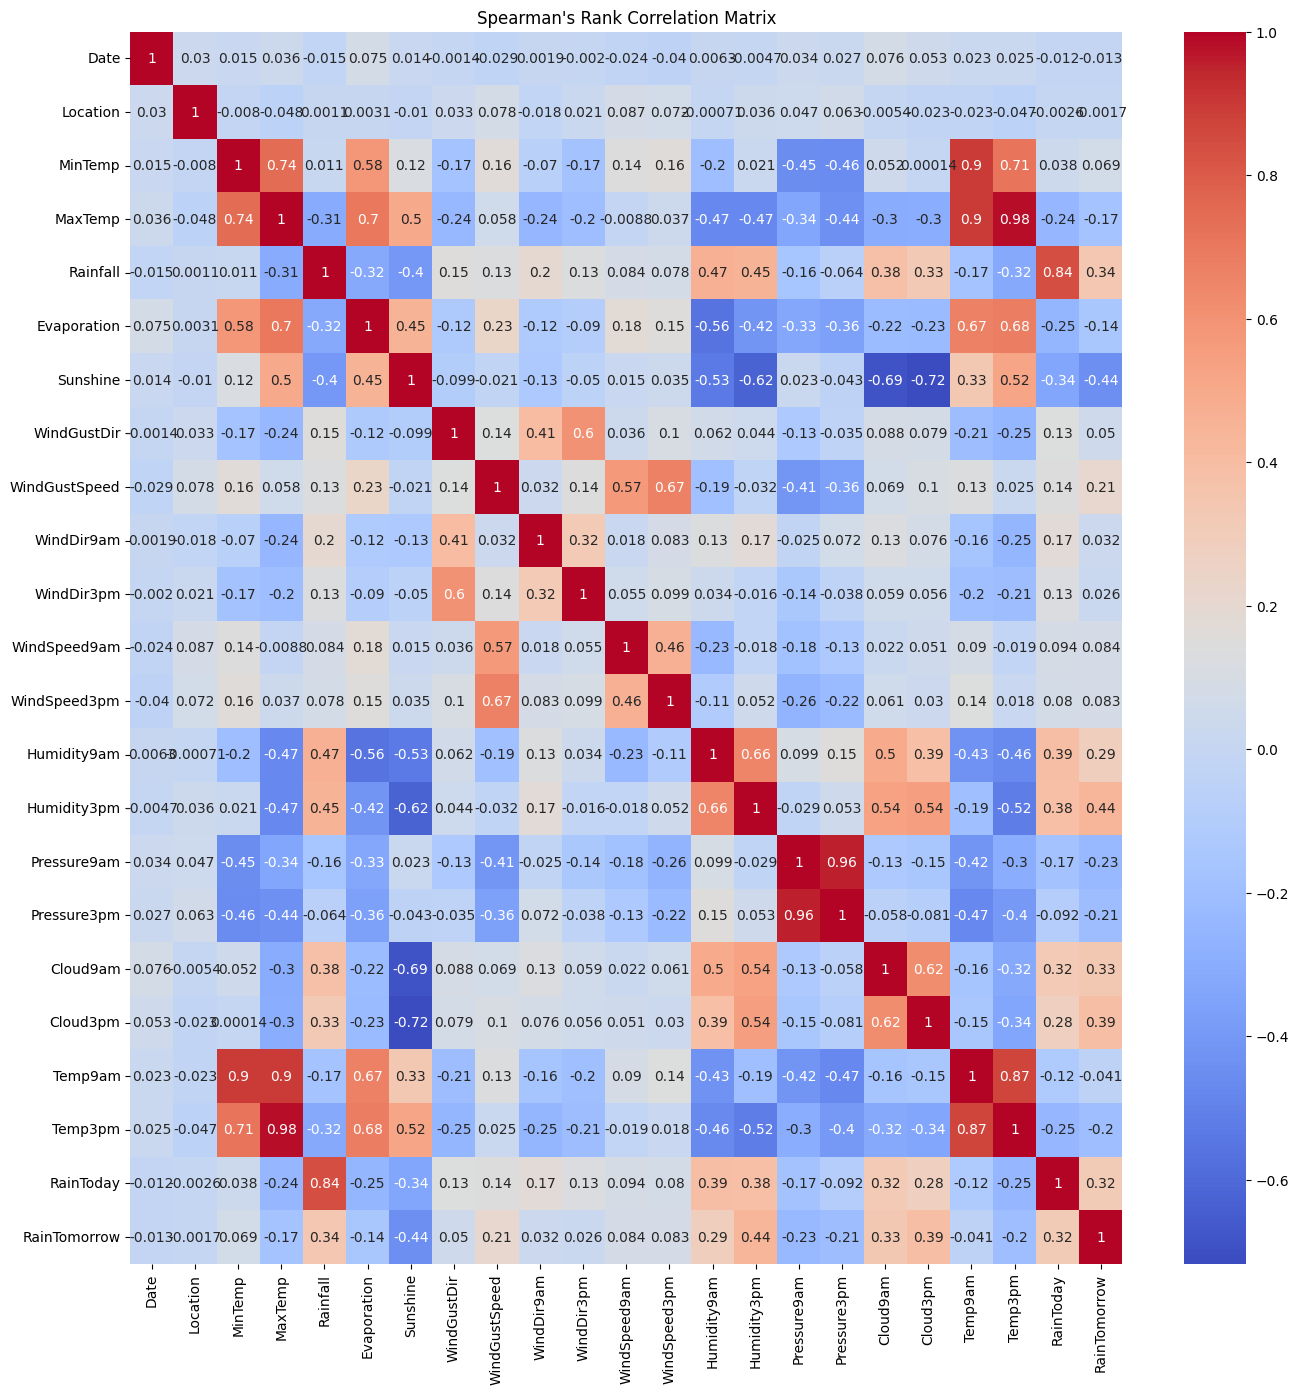

In [42]:
# Compute the Spearman correlation matrix
corr_matrix = encoded_data.corr(method='spearman')

# Visualize the correlation matrix
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Spearman's Rank Correlation Matrix")
plt.show()

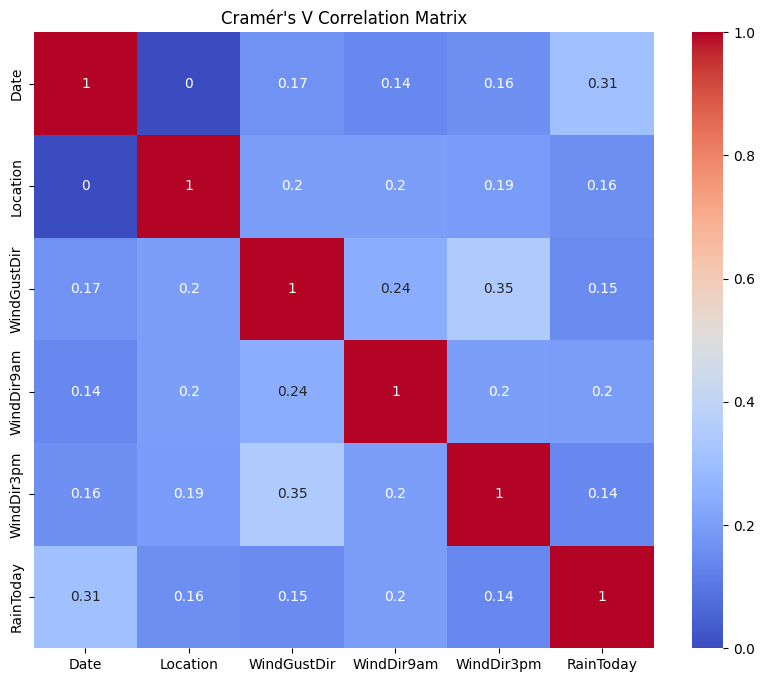

In [43]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Apply Cramér's V for each pair of categorical features
cramers_matrix = pd.DataFrame(index=categorical_cols.columns, columns=categorical_cols.columns)
for col1 in categorical_cols.columns:
    for col2 in categorical_cols.columns:
        cramers_matrix.loc[col1, col2] = cramers_v(encoded_data[col1], encoded_data[col2])

# Visualize the Cramér's V matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix.astype(float), annot=True, cmap='coolwarm')
plt.title("Cramér's V Correlation Matrix")
plt.show()

# Data Pre-Processing

In [4]:
# read the data
data = pd.read_csv('weatherAUS.csv')

# Drop rows with null values in categorical columns
categorical_cols = data.select_dtypes(include=['object'])
data.dropna(subset=categorical_cols.columns, inplace=True)

# Drop the 'Date' column
data.drop('Date', axis=1, inplace=True)

# Encode the target column ('RainTomorrow')
le = LabelEncoder()
data['RainTomorrow'] = le.fit_transform(data['RainTomorrow'])

# Select numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64'])

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='median')
data[numerical_cols.columns] = imputer.fit_transform(numerical_cols)

In [5]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          4.8       8.6           W   
1   Albury      7.4     25.1       0.0          4.8       8.6         WNW   
2   Albury     12.9     25.7       0.0          4.8       8.6         WSW   
3   Albury      9.2     28.0       0.0          4.8       8.6          NE   
4   Albury     17.5     32.3       1.0          4.8       8.6           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0           44.0          W        WNW  ...         71.0         22.0   
1           44.0        NNW        WSW  ...         44.0         25.0   
2           46.0          W        WSW  ...         38.0         30.0   
3           24.0         SE          E  ...         45.0         16.0   
4           41.0        ENE         NW  ...         82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       5.0     16.9     21.8         No   
1       1010.6       1007.8       5.0       5.0     17.2     24.3         No   
2       1007.6       1008.7       5.0       2.0     21.0     23.2         No   
3       1017.6       1012.8       5.0       5.0     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  

[5 rows x 22 columns]

In [6]:
# Separate numerical and categorical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
numerical_cols = numerical_cols[:-1]
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

X = data_encoded.drop('RainTomorrow', axis=1)
y = data_encoded['RainTomorrow']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
print(f'X_train: {X_train.shape} y_train: {y_train.shape}\n X_val: {X_test.shape} y_val: {y_test.shape}')

X_train: (98968, 108) y_train: (98968,)
 X_val: (24742, 108) y_val: (24742,)


# Model Selection

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [9]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

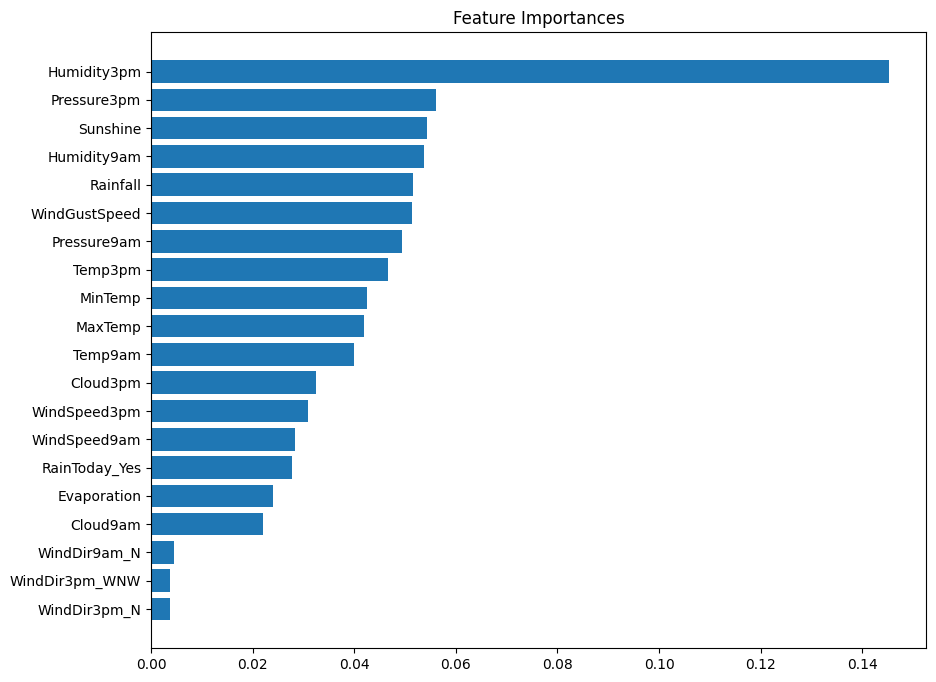

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Select a subset of the most important features (e.g., top 20)
n_features = 20
names_subset = names[:n_features]
importances_subset = importances[indices][:n_features]

# Create plot
plt.figure(figsize=(10, 8))

# Create plot title
plt.title("Feature Importances")

# Add bars
plt.barh(range(n_features), importances_subset, align='center')

# Add feature names as y-axis labels
plt.yticks(range(n_features), names_subset)

# Reverse the order of the y-axis labels to match the order of the bars
plt.gca().invert_yaxis()

plt.show()

# Model Evaluation

Accuracy: 0.86
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     19284
         1.0       0.77      0.51      0.62      5458

    accuracy                           0.86     24742
   macro avg       0.82      0.73      0.76     24742
weighted avg       0.85      0.86      0.85     24742



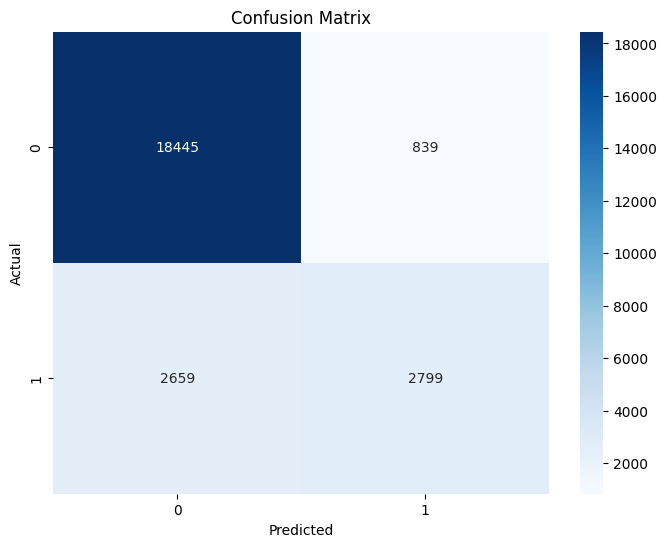

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on validation set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Using LIME and SHAP to Explore or interpret the models decisions

In [12]:
!pip install lime shap

In [13]:
# Ensure the training data is a NumPy array
X_train_array = X_train.values
X_test_array = X_test.values

In [14]:
y_train.name

'RainTomorrow'

In [37]:
feature_names = X_train.columns
class_names = ['Yes', 'No']

In [38]:
from lime.lime_tabular import LimeTabularExplainer

# Create a LIME Tabular Explainer
explainer = LimeTabularExplainer(X_train_array, feature_names=feature_names, class_names=class_names, mode='classification')

# Choose the instance you want to explain
i = np.random.randint(0, X_test_array.shape[0])
instance = X_test_array[i]

# Explain the prediction of the instance
exp = explainer.explain_instance(instance, model.predict_proba, num_features=len(feature_names))

# Show the explanation
exp.show_in_notebook(show_table=True)

In [49]:
print(exp.as_list())

[('Sunshine <= 0.03', 0.07763071112617587), ('Temp3pm <= -0.73', 0.0499362323987484), ('Pressure3pm > 0.64', -0.046533910106408706), ('MaxTemp <= -0.75', 0.03731229913146102), ('Location_Witchcliffe <= 0.00', -0.028459609819745237), ('Location_Perth <= 0.00', -0.025193983001564176), ('Location_NorfolkIsland <= 0.00', -0.02331758083824597), ('WindDir3pm_N > 0.00', 0.02288933790293374), ('Location_Melbourne <= 0.00', -0.022012638144203314), ('Location_Cairns <= 0.00', -0.021868867788475334), ('WindGustDir_WNW <= 0.00', -0.020545978982410954), ('Location_Darwin <= 0.00', -0.019241001854997435), ('WindDir9am_WNW <= 0.00', -0.01883034727870744), ('Location_Dartmoor <= 0.00', -0.01794406659464049), ('Location_Brisbane <= 0.00', -0.017515546041455412), ('WindDir9am_N <= 0.00', -0.01733899109815121), ('Location_Bendigo <= 0.00', -0.017238908248817172), ('MinTemp <= -0.72', -0.01680886198798766), ('Location_AliceSprings <= 0.00', 0.016792557124275253), ('Location_Katherine <= 0.00', -0.01637819

# Some Insights we can grab from this lime exp is

**Sunshine Factor:** The model identified that very limited sunshine (Sunshine <= 0.03) was one of the strongest indicators for predicting rain tomorrow. It implies that overcast or very cloudy conditions today increase the chances of rain the following day.

**Temperature in the Afternoon:** The temperature at 3 PM (Temp3pm <= -0.73) being low also had a significant impact on the prediction, suggesting that cooler temperatures in the afternoon might correlate with the arrival of rain.

**Atmospheric Pressure:** Conversely, a higher atmospheric pressure in the afternoon (Pressure3pm > 0.64) was associated with a lower likelihood of rain. Higher pressure typically suggests more stable atmospheric conditions, which might mean a reduced chance of precipitation.

**Maximum Daily Temperature:** The model also considered a cooler maximum temperature (MaxTemp <= -0.75) as an indicator of potential rainfall, possibly reflecting the cooling effect of cloud cover and precipitation processes.

**Geographic Influence:** Interestingly, the model factored in specific locations as part of the decision-making process. For instance, being in Witchcliffe (Location_Witchcliffe <= 0.00) was found to decrease the likelihood of rain. This could be due to the particular climatic patterns of these regions as learned by the model during training.

**Wind Factors:** Wind direction and speed are known to be indicative of weather patterns. The absence of certain wind directions like WNW for both gusts and at 9 AM (WindGustDir_WNW <= 0.00 and WindDir9am_WNW <= 0.00) contributed slightly to a prediction of no rain. This might imply that certain wind directions are historically associated with dry weather in the data.

In [39]:
import shap

In [40]:
# Initialize the SHAP explainer with the model
explainer = shap.TreeExplainer(model)

In [41]:
X_test

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
23962   1.128686  0.253304 -0.278572     1.077307  0.169765       0.023507   
48619  -1.918387 -1.162209 -0.278572    -0.146242  0.169765      -0.275255   
38622   1.254338  1.252489 -0.184763     1.016129 -1.286092       1.367936   
31532   0.736022  0.031262 -0.067502    -1.492145  0.524852      -0.798089   
8054   -0.614742 -0.301799 -0.278572     0.037290  0.169765      -0.798089   
...          ...       ...       ...          ...       ...            ...   
85128   0.123466 -0.190779 -0.278572    -0.390952 -1.037531      -1.544994   
119405  0.437597  1.419019 -0.278572     1.566726  1.590114       0.994483   
3164   -0.394851 -0.371187 -0.278572    -0.146242  0.169765      -0.947470   
45224  -0.504797 -1.078943 -0.090955    -0.146242  0.169765       0.023507   
10295  -1.243005 -0.551596 -0.278572    -1.002726  0.169765      -0.723399   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
23962       1.563491      1.029684     0.017639     1.254825  ...   
48619      -0.482914      0.096304     1.545926     0.055171  ...   
38622      -0.001407     -0.020368    -0.298558    -0.424690  ...   
31532      -1.325551      0.329649     0.491935     0.822949  ...   
8054       -1.084798     -0.487058     0.017639    -0.664621  ...   
...              ...           ...          ...          ...  ...   
85128      -1.084798     -0.720403     0.070339     0.678991  ...   
119405      2.406128     -0.953748    -1.510648    -1.576358  ...   
3164        0.239346     -1.187093     0.228437     0.055171  ...   
45224      -0.001407      0.096304    -0.930953    -0.184760  ...   
10295      -1.084798     -1.187093    -0.456657    -0.232746  ...   

        WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
23962               0             0              0               0   
48619               0             0              0               0   
38622               0             0              0               0   
31532               0             0              0               0   
8054                0             0              0               0   
...               ...           ...            ...             ...   
85128               0             0              0               0   
119405              0             0              0               0   
3164                0             0              1               0   
45224               0             0              0               0   
10295               0             0              0               0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
23962                0              0             0               0   
48619                0              0             0               0   
38622                0              0             0               0   
31532                0              0             0               0   
8054                 0              0             0               0   
...                ...            ...           ...             ...   
85128                0              0             0               0   
119405               0              0             0               0   
3164                 0              0             0               0   
45224                1              0             0               0   
10295                0              0             0               0   

        WindDir3pm_WSW  RainToday_Yes  
23962                0              0  
48619                0              0  
38622                0              0  
31532                0              1  
8054                 1              0  
...                ...            ...  
85128                0              0  
119405               0              0  
3164                 0              0  
45224                0              1  
10295                0              0  

[24742 rows x 108 columns]

In [42]:
X_test.loc[[119405]]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
119405  0.437597  1.419019 -0.278572     1.566726  1.590114       0.994483   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
119405      2.406128     -0.953748    -1.510648    -1.576358  ...   

        WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
119405              0             0              0               0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
119405               0              0             0               0   

        WindDir3pm_WSW  RainToday_Yes  
119405               0              0  

[1 rows x 108 columns]

In [43]:
y_test[[119405]]

119405    0.0
Name: RainTomorrow, dtype: float64

Choosen an instance of data where the actual probability of raining tomorrow is null. Let's see how our model predicted whether it's rainy or not

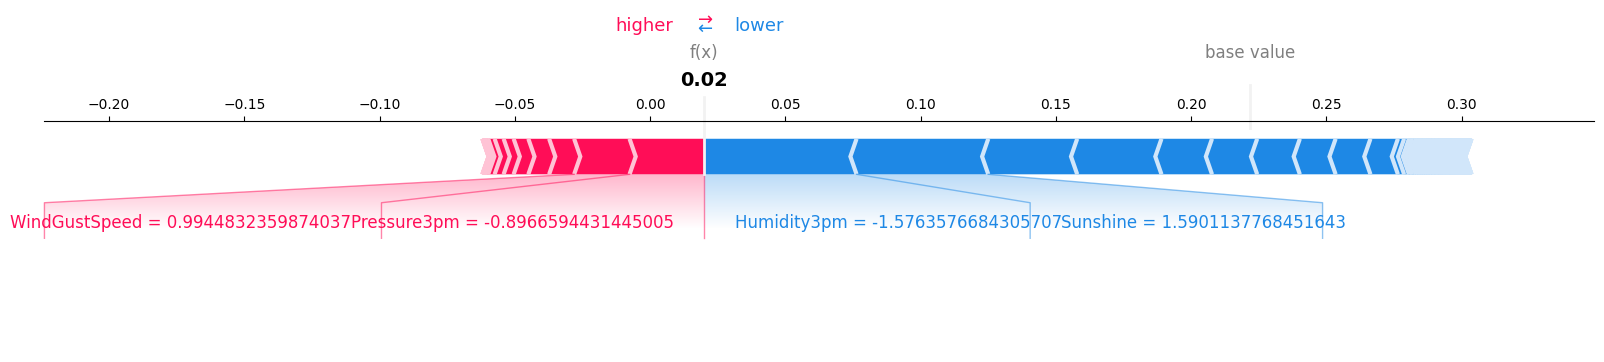

In [44]:
import matplotlib
# Calculate Shap values
choosen_instance = X_test.loc[[119405]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, matplotlib=matplotlib)

### Interpretation :
What you see above is a force plot visualizing shapley values for the features. Feature values in pink cause to increase the prediction. Size of the bar shows the magnitude of the feature's effect. Feature values in blue cause to decrease the prediction. Sum of all feature SHAP values explain why model prediction was different from the baseline.

For the day in question, the weather model predicts there's unlikely to be rain tomorrow. This prediction is largely influenced by two main factors: lower than average wind speeds and higher atmospheric pressure in the afternoon, both of which are commonly associated with clear skies and less chance of rain. Surprisingly, the model also takes into account lower humidity and more sunshine than usual, which we might normally think would decrease the likelihood of rain. However, in this case, these conditions are seen as indicators for potential rain by the model, which could be due to specific local weather patterns or other complex factors within the data that the model has learned. Despite these contrasting indicators, the model strongly leans towards a dry day based on its overall analysis of the conditions.

In [45]:
y_test.loc[[85128]]

85128    1.0
Name: RainTomorrow, dtype: float64

In [46]:
X_test.loc[[85128]]

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
85128  0.123466 -0.190779 -0.278572    -0.390952 -1.037531      -1.544994   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
85128     -1.084798     -0.720403     0.070339     0.678991  ...   

       WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  \
85128              0             0              0               0   

       WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  WindDir3pm_WNW  \
85128               0              0             0               0   

       WindDir3pm_WSW  RainToday_Yes  
85128               0              0  

[1 rows x 108 columns]

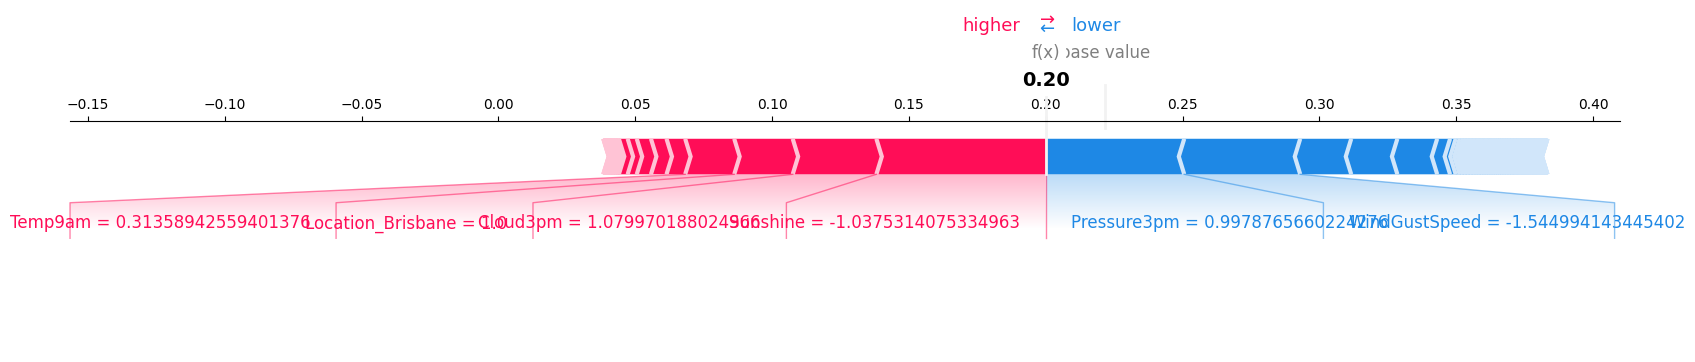

In [47]:
import matplotlib
# Calculate Shap values
choosen_instance = X_test.loc[[85128]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance, matplotlib=matplotlib)

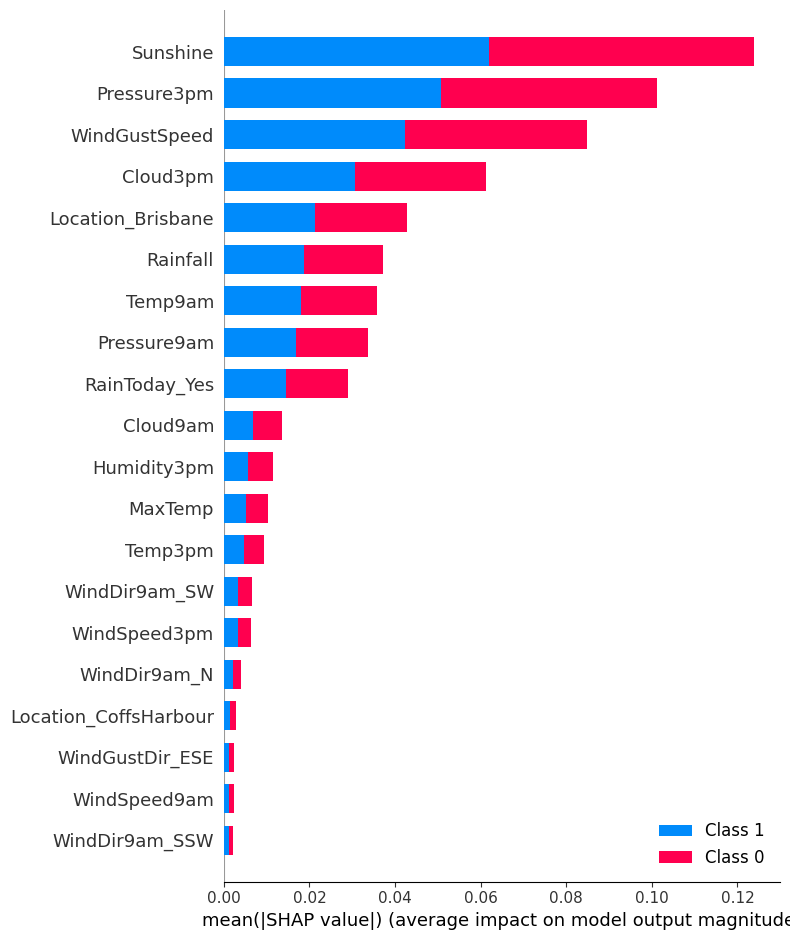

In [48]:
shap.summary_plot(shap_values, X_train)

1. The x-axis indicates the mean absolute SHAP value (average impact on model output magnitude), which shows the average effect each feature has on shifting the model's output from the base value.

2. The features are listed on the y-axis and are typically ordered by the sum of SHAP value magnitudes over all samples. A feature at the top contributes more to the model's output variance.

3. Red bars represent features that, when present or higher in value, push the prediction towards Class 0 (no rain).

4. Blue bars represent features that push the prediction towards Class 1 (rain).

From the plot, we can infer the following:

**Sunshine: **More sunshine is strongly associated with no rain (Class 0), which is intuitive as sunny conditions are less likely to produce rain.

**Pressure3pm:** Higher pressure readings in the afternoon sway the prediction towards no rain, which aligns with typical meteorological understanding where high pressure is often associated with good weather conditions.

**WindGustSpeed:** Lower gust speeds tend to push towards no rain, while higher speeds seem to indicate potential rain, possibly reflecting stormy conditions.

**Cloud3pm:** More cloud cover in the afternoon shifts the prediction towards rain, which is expected as clouds are a precursor to rainfall.

**Location Factor (e.g., Location_Brisbane):** Certain locations have a distinct influence on the prediction, likely due to the specific climatic patterns of those areas.

**Rainfall:** Recent rainfall seems to push the prediction towards more rain, suggesting that wetter conditions might persist.

**Temperature and Humidity:** Surprisingly, certain temperature and humidity conditions seem to have a complex relationship with the prediction, affecting both classes in different ways.

It's important to note that while SHAP values give us the direction and magnitude of each feature's effect on the prediction, they do not necessarily imply causation. Additionally, the impact of a feature can vary between individual predictions, and this plot summarizes the average effect across the dataset.